### 1. Introduction to Data Mining
Определение и значение в бизнес-аналитике:

Интеллектуальный анализ данных (Data Mining) — это процесс извлечения полезной информации и закономерностей из больших объемов данных. Он использует методы статистики, машинного обучения и баз данных.

Значение:
* Принятие обоснованных решений на основе данных.
* Прогнозирование поведения клиентов.
* Оптимизация маркетинговых кампаний.
* Снижение затрат за счет выявления неэффективности.

Применение методов:

1) Розничная торговля: Анализ покупательских корзин для выявления часто приобретаемых товаров (ассоциативные правила).
2) Финансы: Обнаружение мошенничества (анализ аномалий).
3) Производство: Предиктивное техническое обслуживание (анализ временных рядов).
4) Медицина: Диагностика заболеваний (классификация).
5) Социальные сети: Анализ настроений (текстовая аналитика).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('online_retail.csv')

print(data.head())
print(data.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ------------

### 2. Data Preprocessing

In [2]:
data = data.dropna()

label_encoder = LabelEncoder()
if 'CustomerID' in data.columns:
    data['CustomerID'] = label_encoder.fit_transform(data['CustomerID'])

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

data = data[data['Quantity'] > 0]

### 3. Data Exploration and Visualization

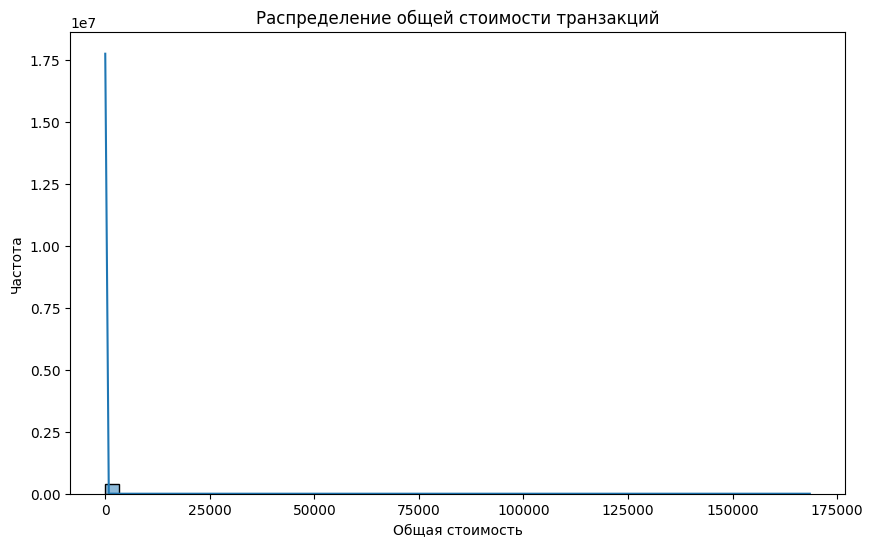

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPrice'], bins=50, kde=True)
plt.title('Распределение общей стоимости транзакций')
plt.xlabel('Общая стоимость')
plt.ylabel('Частота')
plt.show()

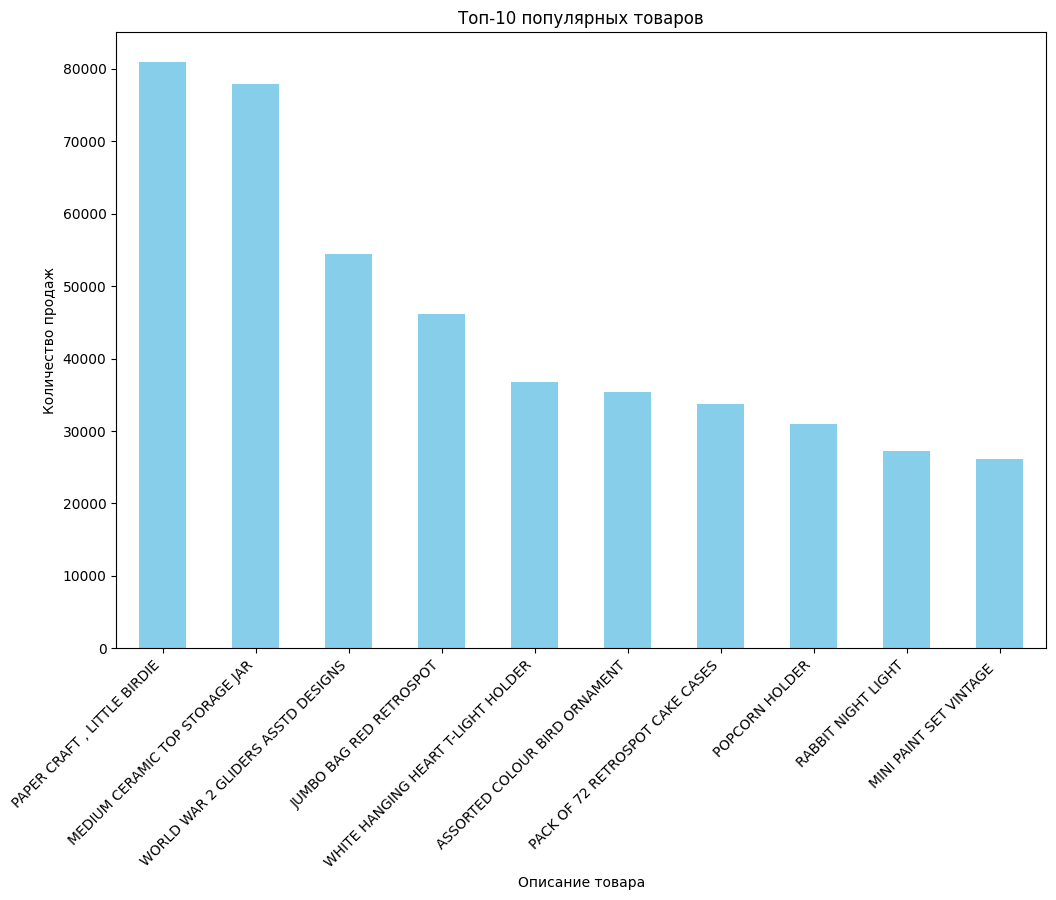

In [4]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_products.plot(kind='bar', color='skyblue')
plt.title('Топ-10 популярных товаров')
plt.xlabel('Описание товара')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\aresm\AppData\Local\Temp\ipykernel_17056\3141091469.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()


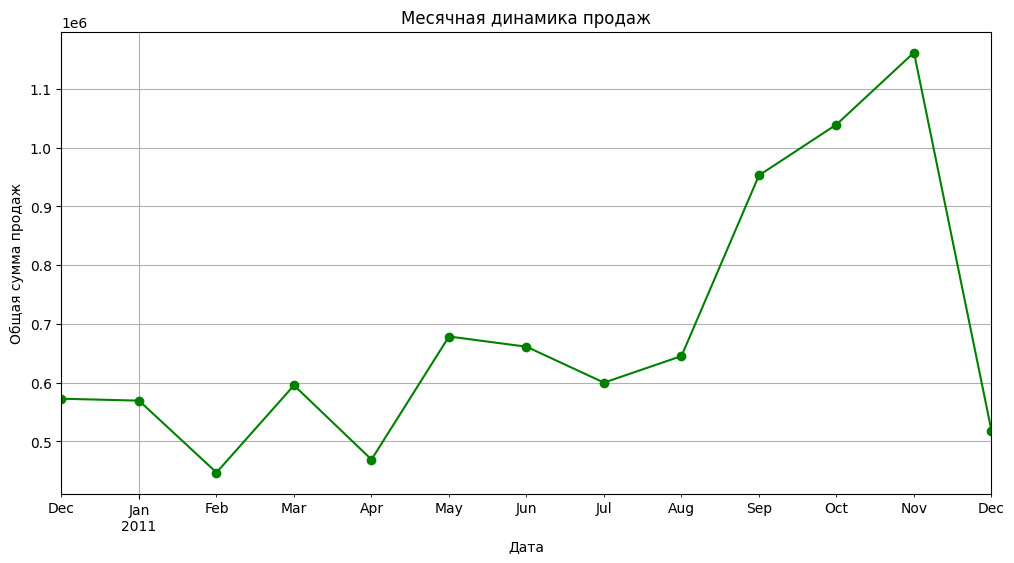

In [5]:
monthly_sales = data.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='green', marker='o')
plt.title('Месячная динамика продаж')
plt.xlabel('Дата')
plt.ylabel('Общая сумма продаж')
plt.grid()
plt.show()

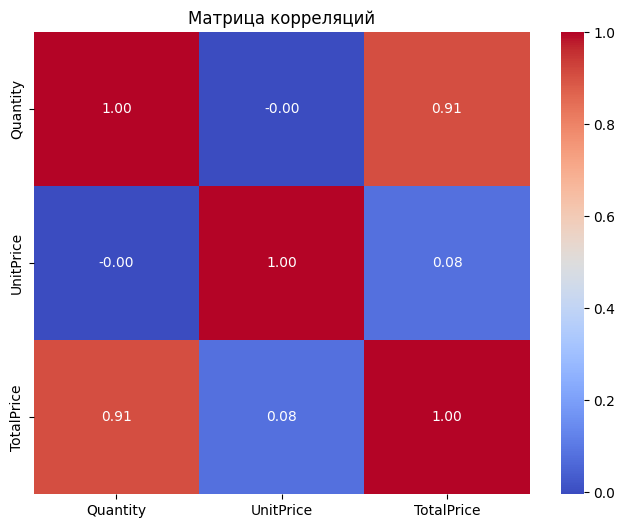

In [6]:
correlation_matrix = data[['Quantity', 'UnitPrice', 'TotalPrice']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

### 4. Feature Selection and Dimensionality Reduction

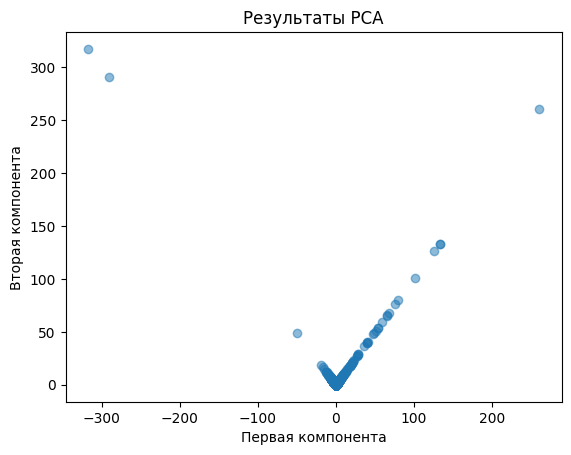

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB
None


In [7]:
features = ['Quantity', 'UnitPrice']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Результаты PCA')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()
print(data.info())

### 5. Classification Techniques

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data[features]
y = (data['TotalPrice'] > data['TotalPrice'].median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7698309983037005
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.74      0.83      0.78     39898
           1       0.81      0.71      0.75     39687

    accuracy                           0.77     79585
   macro avg       0.77      0.77      0.77     79585
weighted avg       0.77      0.77      0.77     79585



In [9]:
dtree = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.9999246089087139
Confusion Matrix (Decision Tree):
 [[39894     4]
 [    2 39685]]


### 6. Advanced Classification Methods

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9999246089087139
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39898
           1       1.00      1.00      1.00     39687

    accuracy                           1.00     79585
   macro avg       1.00      1.00      1.00     79585
weighted avg       1.00      1.00      1.00     79585



In [11]:
# svm = SVC(kernel='rbf', C=1, random_state=42)
# svm.fit(X_train, y_train)
# y_pred_svm = svm.predict(X_test)

# print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
# print(classification_report(y_test, y_pred_svm))

### 7. Clustering Techniques

C:\Users\aresm\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aresm\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~

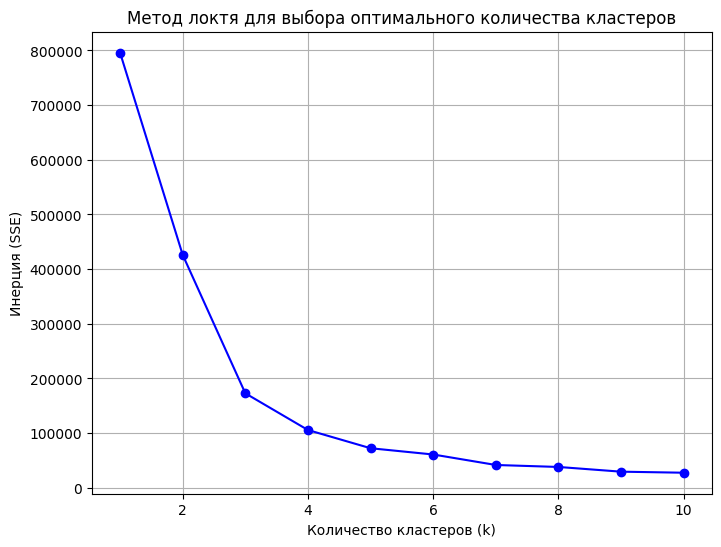

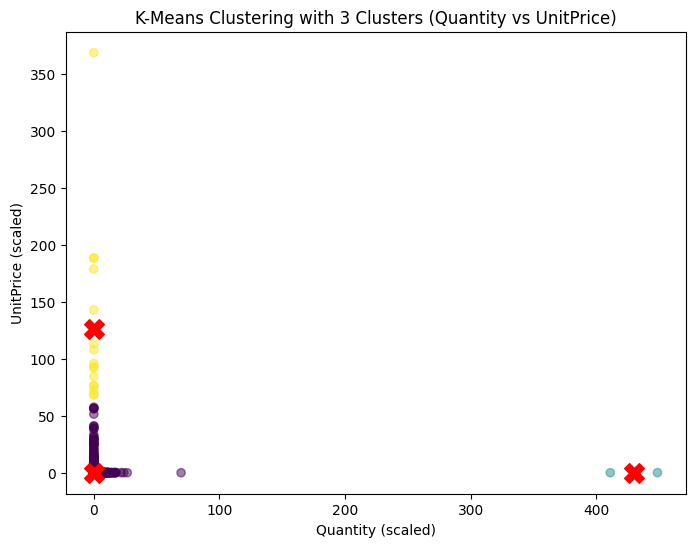

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = [] 

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Метод локтя для выбора оптимального количества кластеров')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция (SSE)')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Центроиды
plt.title('K-Means Clustering with 3 Clusters (Quantity vs UnitPrice)')
plt.xlabel('Quantity (scaled)')
plt.ylabel('UnitPrice (scaled)')
plt.show()

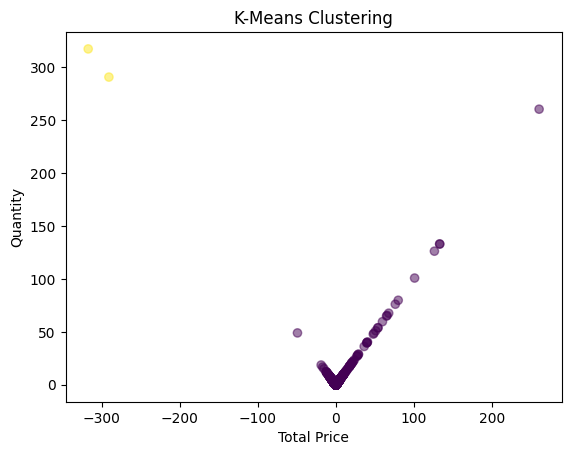

In [13]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.show()

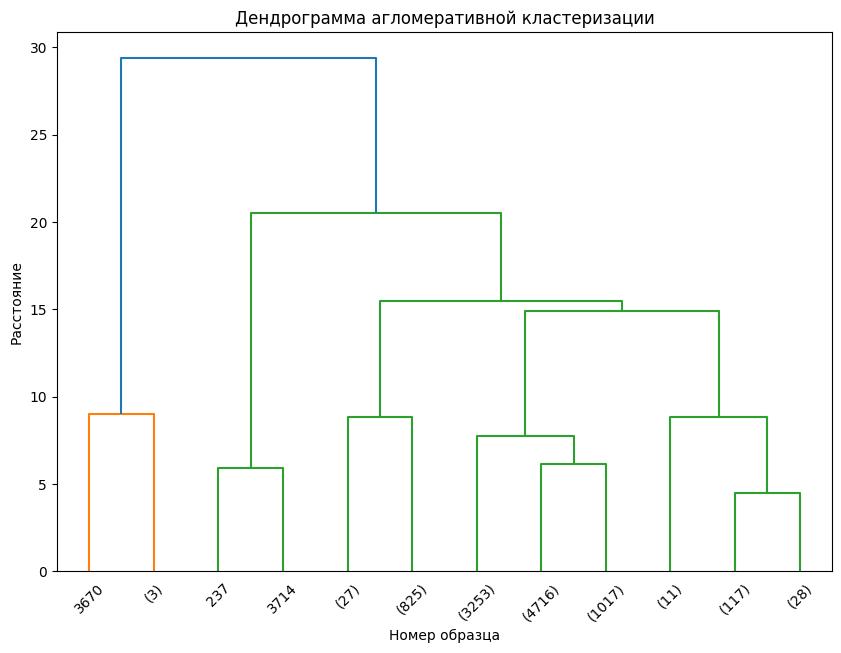

In [14]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

X_sample = X_pca[:10000]

linked = linkage(X_sample, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Номер образца')
plt.ylabel('Расстояние')
plt.show()

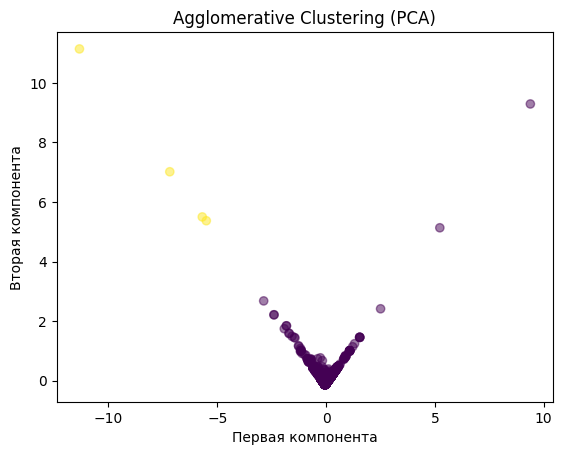

In [15]:
from sklearn.cluster import AgglomerativeClustering

X_sample = X_pca[:10000]

agglom = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters_agg = agglom.fit_predict(X_sample)

plt.scatter(X_sample[:, 0], X_sample[:, 1], c=clusters_agg, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering (PCA)')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()

### 8. Advanced Clustering Techniques

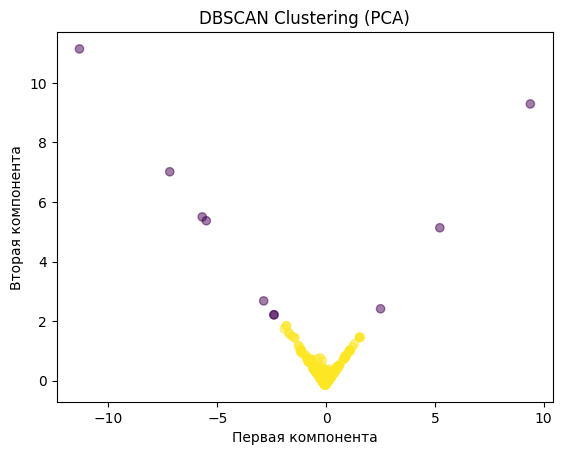

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=4)
clusters_dbscan = dbscan.fit_predict(X_sample)

plt.scatter(X_sample[:, 0], X_sample[:, 1], c=clusters_dbscan, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()

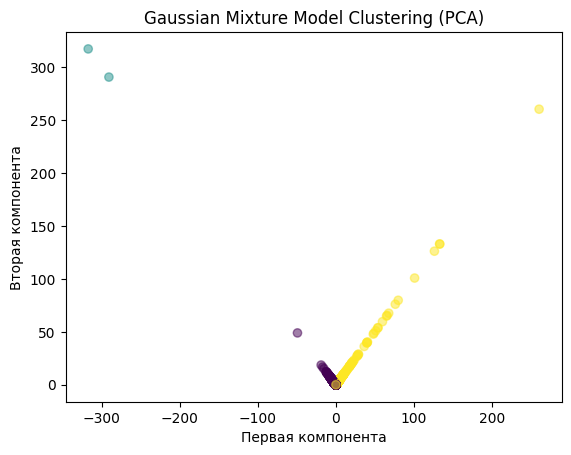

In [17]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
clusters_gmm = gmm.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_gmm, cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Model Clustering (PCA)')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()

### 9. Association Rule Mining

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

# Clean the data
data = data.dropna(subset=['CustomerID', 'Description'])
data['Quantity'] = data['Quantity'].astype(int)

# Create a basket format for transaction analysis
basket = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Convert to binary format (bool type)
basket = basket > 0  # Transforms the data to True/False (bool)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
print(frequent_itemsets.head())

# # Generate association rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# # Display the results
# print("Frequent Itemsets:")
# print(frequent_itemsets.head())

# print("\nAssociation Rules:")
# print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# # Visualize the top 10 rules by lift
# rules[['lift']].head(10).plot(kind='barh', figsize=(10, 6))
# plt.title('Top 10 Association Rules by Lift')
# plt.xlabel('Lift')
# plt.ylabel('Rule Index')
# plt.show()


    support                           itemsets
0  0.032717           (6 RIBBONS RUSTIC CHARM)
1  0.021000  (60 CAKE CASES VINTAGE CHRISTMAS)
2  0.029608      (60 TEATIME FAIRY CAKE CASES)
3  0.022578   (72 SWEETHEART FAIRY CAKE CASES)
4  0.035557       (ALARM CLOCK BAKELIKE GREEN)


In [8]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt

# Пример данных для анализа
data = pd.read_csv('Online_Retail.csv', encoding='ISO-8859-1')

# Удаление пропусков
data = data.dropna(subset=['CustomerID', 'Description'])

# Формирование корзин (basket)
basket = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Преобразование данных в логический формат
basket = basket > 0

# Применение Apriori
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Убедитесь, что itemsets в формате frozenset
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(frozenset)

# Генерация правил
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Отображение правил
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Визуализация топ-10 правил
rules[['lift']].head(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule Index')
plt.show()


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [9]:
print(frequent_itemsets.head())
print(type(frequent_itemsets['itemsets'].iloc[0]))  # Должно быть frozenset


    support                           itemsets
0  0.032717           (6 RIBBONS RUSTIC CHARM)
1  0.021000  (60 CAKE CASES VINTAGE CHRISTMAS)
2  0.029608      (60 TEATIME FAIRY CAKE CASES)
3  0.022578   (72 SWEETHEART FAIRY CAKE CASES)
4  0.035557       (ALARM CLOCK BAKELIKE GREEN)
<class 'frozenset'>


In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

# Преобразуем itemsets в формат frozenset
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(frozenset)

# Генерация ассоциативных правил
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Вывод результатов
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Визуализация топ-10 правил по lift
import matplotlib.pyplot as plt
rules[['lift']].head(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule Index')
plt.show()

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [5]:
print(frequent_itemsets.head())

    support                           itemsets
0  0.032717           (6 RIBBONS RUSTIC CHARM)
1  0.021000  (60 CAKE CASES VINTAGE CHRISTMAS)
2  0.029608      (60 TEATIME FAIRY CAKE CASES)
3  0.022578   (72 SWEETHEART FAIRY CAKE CASES)
4  0.035557       (ALARM CLOCK BAKELIKE GREEN)


### 10. Anomaly Detection

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

X = data[['Quantity', 'UnitPrice']]

iso_forest = IsolationForest(contamination=0.001, random_state=42)
data['Anomaly_IF'] = iso_forest.fit_predict(X)

plt.scatter(data['TotalPrice'], data['Quantity'], c=data['Anomaly_IF'], cmap='coolwarm', alpha=0.5)
plt.title('Isolation Forest Anomalies')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.show()

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
data['Anomaly_LOF'] = lof.fit_predict(X)

plt.scatter(data['TotalPrice'], data['Quantity'], c=data['Anomaly_LOF'], cmap='coolwarm', alpha=0.5)
plt.title('LOF Anomalies')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.show()

### 11. Time Series Analysis

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

time_series = data.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

time_series.plot(title='Monthly Sales Trends')
plt.show()

plot_acf(time_series)
plt.show()
plot_pacf(time_series)
plt.show()

model = ARIMA(time_series, order=(2, 1, 2))  # Example parameters
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=12)
time_series.plot(label='Original')
forecast.plot(label='Forecast', color='red')
plt.legend()
plt.title('Sales Forecast')
plt.show()

### 12. Text Mining and NLP

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
import matplotlib.pyplot as plt

data = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

nltk.download('punkt')
nltk.download('stopwords')

data['Description'].head()

data = data.dropna(subset=['Description'])

tokenized_descriptions = data['Description'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
filtered_descriptions = tokenized_descriptions.apply(lambda x: [word for word in x if word.lower() not in stop_words])

stemmer = PorterStemmer()
stemmed_descriptions = filtered_descriptions.apply(lambda x: [stemmer.stem(word) for word in x])

sentiments = data['Description'].apply(lambda x: TextBlob(x).sentiment)

print("Tokenized Descriptions:\n", tokenized_descriptions.head())
print("Filtered Descriptions (no stopwords):\n", filtered_descriptions.head())
print("Stemmed Descriptions:\n", stemmed_descriptions.head())
print("Sentiment Analysis:\n", sentiments.head())

sentiments_score = sentiments.apply(lambda x: x.polarity)
plt.figure(figsize=(10, 6))
plt.hist(sentiments_score, bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of Product Descriptions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()